# Image Manipulation in BART

In this notebook we will explore BART's capacity for image manipulation.

In particular, we will explore the `avg`, `conv`, `crop`, `filter`, `flip`, `invert`, `mip`, `noise`, `phantom`, `repmat`, `reshape`, `resize`, `sdot`, `slice`, and `threshold` commands.

# TODO

## Full Tutorials

* [x] avg
* [x] conv
* [x] filter
* [x] flip
* [x] invert
* [x] mip
* [x] noise
* [x] phantom
* [x] resize
* [x] slice
* [ ] threshold 

## Expand

* [ ] gnuplot

* `phantom`
 * `-t` flag usage
 * `-s` understanding coil sensitivity
 * Phantom in k-space doesn't quite look correct
 
* `avg`
 * default value of `-W`
 * intuition for the process
 
* show full tutoria

## Documentation Observations

* `phantom`
 * `-s` flag cannot have a value greater than 8
* `conv`
 * odd dimensions
* `avg`
 * dimension must equal 1
 
 
## Ideas

* `resize`
 * `-c` flag expansion such that the user can assign a specific center point?
 
## Questions

* using `repmat` to expand the MIP/avg resulting arrays
 * is there a more effective way to demonstrate these tools?

In [47]:
bart

BART. Available commands are:
avg         bench       bitmask     cabs        caldir      calmat      
carg        casorati    cc          ccapply     cdf97       circshift   
conj        conv        copy        cpyphs      creal       crop        
delta       ecalib      ecaltwo     estdelay    estdims     estshift    
estvar      extract     fakeksp     fft         fftmod      fftshift    
filter      flatten     flip        fmac        homodyne    invert      
itsense     join        lrmatrix    mandelbrot  mip         nlinv       
noise       normalize   nrmse       nufft       ones        pattern     
phantom     pics        pocsense    poisson     repmat      reshape     
resize      rof         rss         sake        saxpy       scale       
sdot        show        slice       spow        sqpics      squeeze     
std         svd         threshold   toimg       traj        transpose   
twixread    var         vec         version     walsh       wave        
wavelet     wavepsf  

: 1

## Utilities

The following function displays images such that we can view the results of our work

In [116]:
# BASH function to write BART file to png,
# display the png, and then temove it
function imshow () {
    bart toimg $1 $1
    cat $1.png | display
    rm $1.png
}

## Generating a Phantom

We will be performing initial manipulations on a Shepp-Logan numerical phantom. A phantom can be generated using the `phantom` command.

In [4]:
bart phantom -h

Usage: phantom [-s d] [-S d] [-k] [-t <string>] [-x d] [-3] <output>

Image and k-space domain phantoms.

-s nc      	nc sensitivities
-S Output nc sensitivities
-k		k-space
-t file      	trajectory
-x n      	dimensions in y and z
-3		3D
-h		help


Note that `-s` cannot be larger than 8

In [117]:
bart phantom -x 256 shepp_logan

Where we use `-x` to specify the dimension

Writing 1 image(s)...done.


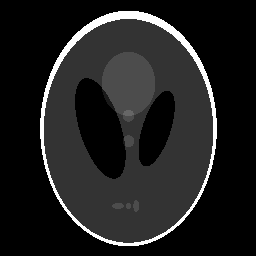

In [50]:
imshow shepp_logan

We can also generate the phantom in K-Space, using the `-k` flag. `-t` specifies a trajectory file.

**TODO: TRAJECTORY FILE EXAMPLE**

Writing 1 image(s)...done.


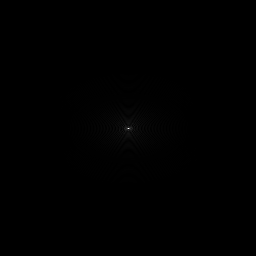

In [16]:
bart phantom -x 256 -k shepp_logan_k_space

imshow shepp_logan_k_space

#### TODO: This doesn't look quite right?

## ` bart avg`

We can use BART to take the average across specified dimensions

In [17]:
bart avg -h

Usage: avg [-w] <bitmask> <input> <output>

Calculates (weighted) average along dimensions specified by bitmask.

-w		weighted average
-h		help


We use the `bitmask` command to specify dimensions to average over. We then use the `repmat` command to replicate the averaged array to `256 x 256` dimensions to better visualize the result. 

In [86]:
bart repmat -h

Usage: repmat dimension repetitions <input> <output>

Repeat input array multiple times along a certain dimension.

-h		help


Writing 1 image(s)...done.


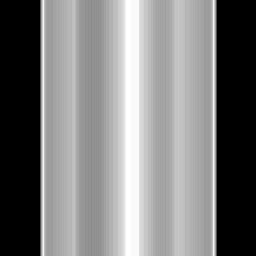

In [89]:
bart avg $(bart bitmask 0) shepp_logan shepp_logan_avg
bart repmat 0 256 shepp_logan_avg avg_expanded

imshow avg_expanded

We can use the `-w` flag to weight the average

**TODO: What does weighted mean?**

Writing 1 image(s)...done.


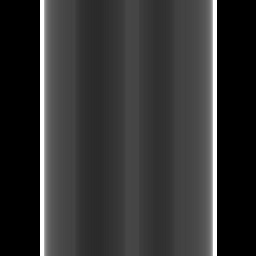

In [90]:
bart avg -w $(bart bitmask 0) shepp_logan shepp_logan_avg
bart repmat 0 256 shepp_logan_avg avg_expanded

imshow avg_expanded

## `bart mip`

The `mip` command allows us to perform a maximum intensity projection across a specified dimension

**TODO: add more information about Maximum Intensity Projection**

In [91]:
bart mip -h

Usage: mip [-m] [-a] bitmask <input> <output>

Maximum (minimum) intensity projection (MIP) along dimensions specified by bitmask.


-m		minimum
-a		do absolute value first
-h		help


The first example is the default Maximum Intensity Projection. The second example is a Minimum Intensity Projection, triggered by the `-m` flag.  (**TODO: MORE INFORMATION HERE**)

Writing 1 image(s)...done.


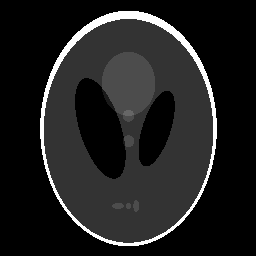

Writing 1 image(s)...done.


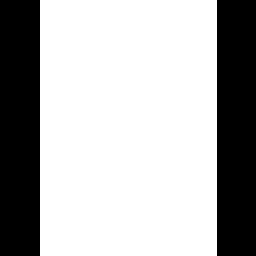

In [100]:
bart mip $(bart bitmask 0) shepp_logan shepp_logan_mip
bart repmat 0 256 shepp_logan_mip mip_expanded

imshow shepp_logan
imshow mip_expanded

Observe that the bright white pixels of higher intensity dominate the MIP

Writing 1 image(s)...done.


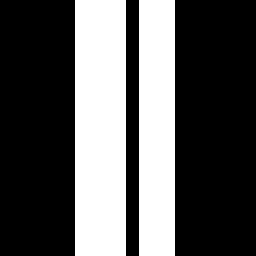

In [101]:
bart mip -m $(bart bitmask 0) shepp_logan shepp_logan_mip
bart repmat 0 256 shepp_logan_mip mip_expanded

imshow mip_expanded

## `bart slice`

In [107]:
bart slice -h

Usage: slice dimension position <input> <output>

Extracts a slice from {position} along {dimension}.

-h		help


Writing 1 image(s)...done.


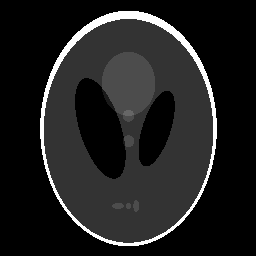

In [113]:
imshow shepp_logan

The following is a slice taken from the middle of the image

Writing 1 image(s)...done.


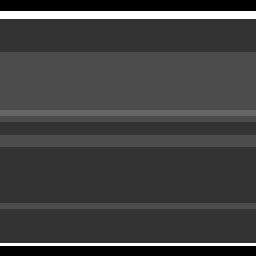

In [112]:
bart slice 1 128 shepp_logan slice_1
bart repmat 1 256 slice_1 slice_rep

imshow slice_rep

The following is a slice from the leftmost slice of the image

Writing 1 image(s)...done.


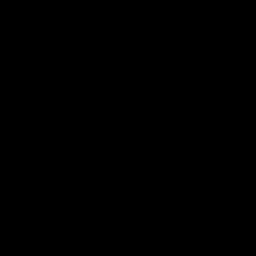

In [114]:
bart slice 1 0 shepp_logan slice_1
bart repmat 1 256 slice_1 slice_rep

imshow slice_rep

## `bart filter`

The `filter` tool applies a simple median filter of length `len` along `dim`

In [1]:
bart filter -h

Usage: filter [-m d] [-l d] <input> <output>

Apply filter.


-m dim      	median filter along dimension dim
-l len      	length of filter
-h		help


the `-m` and `-l` flags are necessary, and the length must be > 0

In [60]:
bart filter -m 0 -l 10 shepp_logan shepp_logan_filtered_0

Writing 1 image(s)...done.


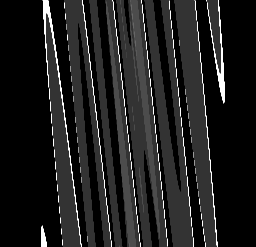

In [61]:
imshow shepp_logan_filtered

By changing the `-m` flag, we can modify the dimension along which the filter is applied

Writing 1 image(s)...done.


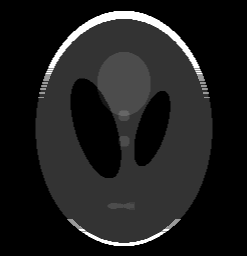

In [47]:
bart filter -m 1 -l 10 shepp_logan shepp_logan_filtered_1

imshow shepp_logan_filtered_1

Below, we increase the length of the filter by modifying the `-l` flag:

Writing 1 image(s)...done.


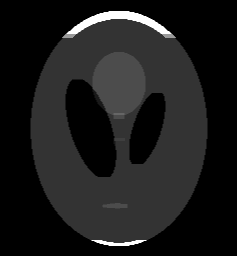

In [48]:
bart filter -m 1 -l 20 shepp_logan shepp_logan_filtered_2

imshow shepp_logan_filtered_2

## `bart conv`

BART also features a built in convolution tool. We will create a simple averaging filter and convolve it with the image

In [70]:
bart ones 2 11 11 averager

In [66]:
bart show -m averager

Type: complex float
Dimensions: 16
AoD:	10	10	1	1	1	1	1	1	1	1	1	1	1	1	1	1


The `ones` tool creates an array of specified dimensions (2) with each subsequent argument offering the size of that dimension (11 x 11). Note that the dimensions here must be odd **TODO: CLARIFY WHY**

In [71]:
bart conv -h

Usage: conv bitmask <input> <kernel> <output>

Performs a convolution along selected dimensions.

-h		help


Here again we employ the `bitmask` tool to specify the dimensions to convolve on. We will pass in our `averager` filter as the `kernel`. 

In [72]:
bart conv $(bart bitmask 0 1) shepp_logan averager shepp_logan_averaged

Writing 1 image(s)...done.


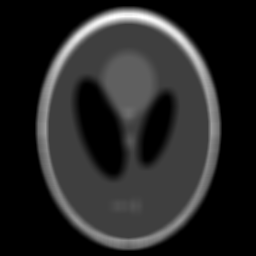

In [73]:
imshow shepp_logan_averaged

Observe the effect of the averaging filter on the image: the phantom now appears blurred.

Next, we will demonstrate how BART can be used to apply 1-dimensional filters across the `0`-axis and `1`-axis

Writing 1 image(s)...done.


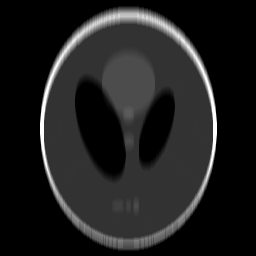

In [80]:
bart ones 1 11 one_dim_avg
bart conv $(bart bitmask 0) shepp_logan one_dim_avg shepp_logan_avg_1d
imshow shepp_logan_avg_1d

In [1]:
bart conv $(bart bitmask 1) shepp_logan one_dim_avg shepp_logan_avg_1d
imshow shepp_logan_avg_1d

# TODO: Understand and fix this error

bart: /build/bart-HgZJo9/bart-0.4.02/src/num/conv.c:134: conv_plan: Assertion `(1 == idims2[i]) || (idims2[i] == odims[i]) || (idims2[i] == idims1[i])' failed.
Aborted (core dumped)
Traceback (most recent call last):
  File "/usr/local/bin/imshow", line 15, in <module>
    import sigpy.plot as pl
ImportError: No module named sigpy.plot


: 1

## `bart [crop|resize]`

BART features a crop tool that allows us to crop images along specified dimensions, or a resize tool that can be applied more generally

In [7]:
bart crop -h

Usage: crop dimension size <input> <output>

Extracts a sub-array corresponding to the central part of {size} along {dimension}

-h		help


Writing 1 image(s)...done.


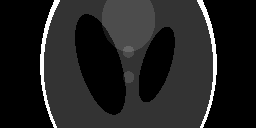

In [24]:
bart crop 0 128 shepp_logan cropped_phantom_0

imshow cropped_phantom_0

Writing 1 image(s)...done.


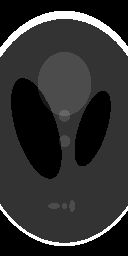

In [22]:
bart crop 1 128 shepp_logan cropped_phantom_1

imshow cropped_phantom_1

We can see how `crop` commands can be strung together to crop across multiple dimensions

Writing 1 image(s)...done.


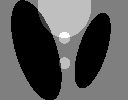

In [23]:
bart crop 1 128 cropped_phantom_0 cropped_phantom

imshow cropped_phantom

The `resize` allows for more general manipulation of image dimensions

In [16]:
bart resize -h

Usage: resize [-c] dim1 size1 ... dimn sizen <input> <output>

Resizes an array along dimensions to sizes by truncating or zero-padding.

-c		center
-h		help


Each `dim` is paired with a respective `size`, allowing for eaching enlarging or cropping of images in one command. 

The previous example is shown below:

Writing 1 image(s)...done.


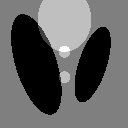

In [25]:
bart resize -c 0 128 1 128 shepp_logan resized_phantom

imshow resized_phantom

The `-c` flag centers the cropping. Without this flag, we crop to the corner

Writing 1 image(s)...done.


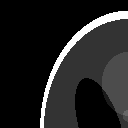

In [26]:
bart resize 0 128 1 128 shepp_logan resized_phantom
imshow resized_phantom

Next, we will enlarge the phantom. `crop` zero pads the image. 

Writing 1 image(s)...done.


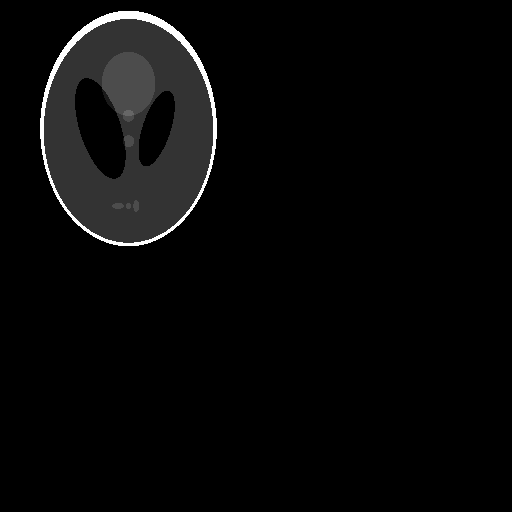

In [29]:
bart resize 0 512 1 512 shepp_logan enlarged_phantom
imshow enlarged_phantom

Writing 1 image(s)...done.


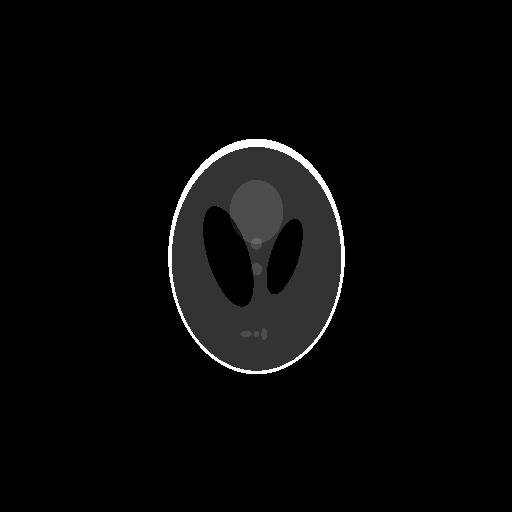

In [30]:
bart resize -c 0 512 1 512 shepp_logan enlarged_phantom
imshow enlarged_phantom

## `bart flip`

This tool allows us to reverse an image's dimensions

In [32]:
bart flip -h

Usage: flip bitmask <input> <output>

Flip (reverse) dimensions specified by the {bitmask}.

-h		help


The following cells demonstrate flips along dimensions `0`, `1` and both

Writing 1 image(s)...done.


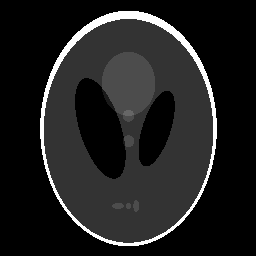

Writing 1 image(s)...done.


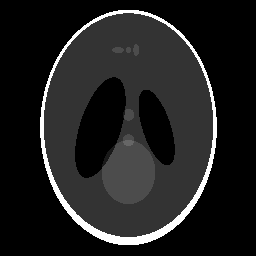

In [39]:
bart flip $(bart bitmask 0) shepp_logan flipped_phantom_0
imshow shepp_logan 
imshow flipped_phantom_0

Writing 1 image(s)...done.


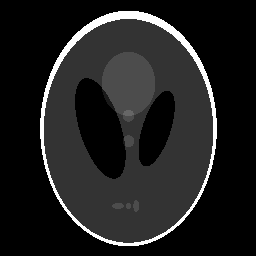

Writing 1 image(s)...done.


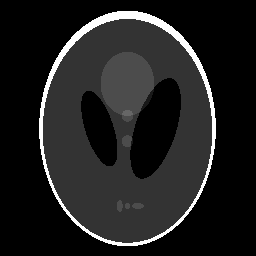

In [41]:
bart flip $(bart bitmask 1) shepp_logan flipped_phantom_1
imshow shepp_logan 
imshow flipped_phantom_1

Writing 1 image(s)...done.


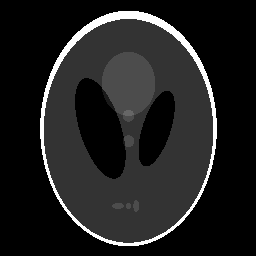

Writing 1 image(s)...done.


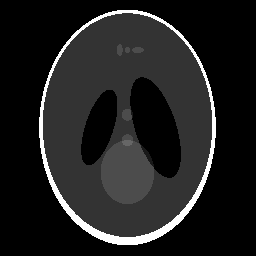

In [42]:
bart flip $(bart bitmask 0 1) shepp_logan flipped_phantom_01
imshow shepp_logan 
imshow flipped_phantom_01

## `bart invert`

The `invert` tool can be applied to images as well as arrays

In [45]:
bart invert -h

Usage: invert <input> <output>

Invert array (1 / <input>). The output is set to zero in case of divide by zero.

-h		help


Writing 1 image(s)...done.


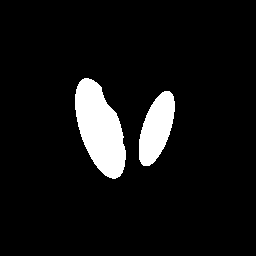

In [46]:
bart invert shepp_logan inverse_phantom
imshow inverse_phantom

## `bart noise`

In [49]:
bart noise -h

Usage: noise [-s d] [-r] [-n f] <input> <output>

Add noise with selected variance to input.

-s random seed initialization
-r		real-valued input
-n variance      	DEFAULT: 1.0
-h		help


Below, we generate noise with a seed of `10` (`-s` flag) and a variance of `1` (`-n`)

Writing 1 image(s)...done.


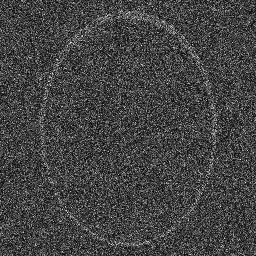

In [55]:
bart noise -s 10 -n 1 shepp_logan noisy_phantom

imshow noisy_phantom

## `bart threshold`



In [115]:
bart threshold -h

Usage: threshold [-H ...] [-W ...] [-L ...] [-D ...] [-j d] [-b d] lambda <input> <output>

Perform (soft) thresholding with parameter lambda.

-H		hard thresholding
-W		daubechies wavelet soft-thresholding
-L		locally low rank soft-thresholding
-D		divergence-free wavelet soft-thresholding
-j bitmask      	joint soft-thresholding
-b blocksize      	locally low rank block size
-h		help


Hard thresholding shown below

Writing 1 image(s)...done.


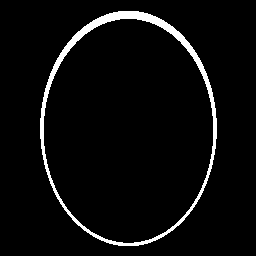

In [128]:
bart threshold -H 0.4 shepp_logan threshold_test

imshow threshold_test

Soft wavelet thresholding:

Writing 1 image(s)...done.


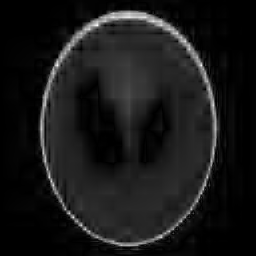

In [135]:
bart threshold -W 0.4 shepp_logan threshold_test

imshow threshold_test

Low-rank thresholding

Writing 1 image(s)...done.


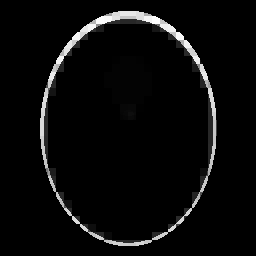

In [137]:
bart threshold -L 0.4 shepp_logan threshold_test

imshow threshold_test